# This model will use the CNN model trained on the CIFAR-100 images containing fish, furniture, outdoor scenes, and people

### load CNN model

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using Theano backend.
Using gpu device 0: GeForce GTX 960 (CNMeM is disabled, cuDNN 5103)


In [3]:
from keras.models import load_model

In [5]:
CNN_model = load_model('F:/Kaggle/The Nature Conservancy/cnn_models/cnn_cifar100_with_fish_table_outdoor_people.h5')

### load some images 

In [6]:
import numpy as np

from PIL import Image
import os, sys
import glob

In [1]:
# The load_path function loads the .jpg image and converts it to a numpy array. 
# It also extracts the image label from path and places it into file_array
import os
from PIL import Image
import time

def load_data(paths):
    
    X = []
    file_array = []
    label_array = []
  
    # Images are resized because they range from 720-924 and 1192-1280 Making it difficult to use in models
    # and neural networks
    # Most 'common' original image size
    # The 'im.resize' switches these dimensions. That is why they are backwards here.
    size = 1280, 720
    
    print('..loading images')
    start = time.time()
    
    # if loading 'training set' also extract label from file
        
    for path in glob.glob(paths):

        try:
            # load image and convert to np array
            im = Image.open(path)
            im = im.resize((size[0], size[1]))
            im = np.asarray(im)
            X.append(im)

            # extract file name EX: img_00003.jpg
            base = os.path.basename(path)
            file_array.append(base)

            if 'train' in paths:
                # extract fish label (ALB, BET, DOL, LAG, NoF, OTEHR, SHARK, YFT)
                directory = os.path.split(path)[0]
                label_array.append(os.path.split(directory)[1])

        except IOError:
            print "cannot load or resize image for %s" % path


    print('time elapsed: ' + str(time.time() - start))

    if 'train' in paths:
        return X, file_array, label_array

    else:
        return X, file_array


In [8]:
X, file_array, label_array = load_data('F:/Kaggle/The Nature Conservancy/train/train/*/*')

..loading images
time elapsed: 73.4029998779


In [64]:
X_train = np.asarray(X)

In [10]:
X_cnn = np.zeros([X_train.shape[0], X_train.shape[3], X_train.shape[1], X_train.shape[2]], np.uint8)
for samples in xrange(X_train.shape[0]):
    for channels in xrange(X_train.shape[3]):
        X_cnn[samples,channels,:,:] = X_train[samples,:,:,channels]

In [ ]:
def create_batch(X, Y, index, batch_size):
    X_batch = X[index:index+batch_size,:,:,:]
    X_batch = np.float16(X_batch)/255
    
    Y_batch = Y[index:index+batch_size,:]
    return X_batch, Y_batch

In [11]:
X_train.shape

(3777L, 720L, 1280L, 3L)

In [13]:
import numpy

In [15]:
sample = 8
picture = numpy.zeros([720,1280,3])
for channel in xrange(3):
    picture[:,:,channel] = X_train[sample,channel,:,:]

ValueError: could not broadcast input array from shape (1280,3) into shape (720,1280)

In [32]:
test_array = X_train[0,:200,300:700,:]

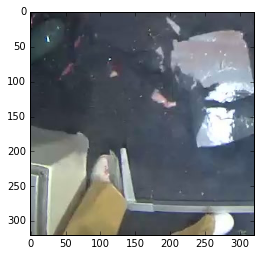

In [157]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = picture
n = 7
# imshow(np.asarray(X_train[0,100:400,300:600,:])) really good example (confidence of fish: 99%)
imshow(np.asarray(X_train[0,380:700,380:700,:]))

In [237]:
from PIL import Image
im = Image.fromarray(X_train[0,380:700,380:700,:])

In [238]:
im.save('F:/Kaggle/The Nature Conservancy/reshaped_images/img1.jpg')

In [272]:
im = Image.open('F:/Kaggle/The Nature Conservancy/reshaped_images/img1.jpg')
im = im.resize((32, 32))
im = np.asarray(im)

In [273]:
im.shape

(32L, 32L, 3L)

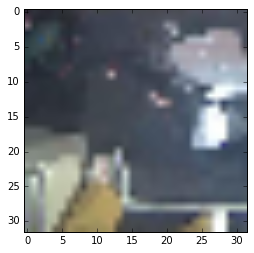

In [274]:
imshow(im)

In [275]:
im = np.asarray(im)

In [276]:
im.shape

(32L, 32L, 3L)

In [277]:
im = np.reshape(im, [1, 32, 32, 3])

In [278]:
X_train1 = im

In [279]:
X_cnn = np.zeros([X_train1.shape[0], X_train1.shape[3], X_train1.shape[1], X_train1.shape[2]])
for samples in xrange(X_train1.shape[0]):
    for channels in xrange(X_train1.shape[3]):
        X_cnn[samples,channels,:,:] = X_train1[samples,:,:,channels]

In [280]:
X_cnn = X_cnn/float(255)

In [281]:
X_cnn

array([[[[ 0.17647059,  0.18823529,  0.16862745, ...,  0.31372549,
           0.30196078,  0.29411765],
         [ 0.29803922,  0.16470588,  0.14117647, ...,  0.30196078,
           0.29803922,  0.28627451],
         [ 0.49019608,  0.14901961,  0.21176471, ...,  0.2745098 ,
           0.27843137,  0.30196078],
         ..., 
         [ 0.52156863,  0.49019608,  0.54117647, ...,  0.22352941,
           0.2627451 ,  0.28627451],
         [ 0.49803922,  0.46666667,  0.49803922, ...,  0.32941176,
           0.2627451 ,  0.29803922],
         [ 0.48627451,  0.41960784,  0.50196078, ...,  0.25098039,
           0.25882353,  0.29803922]],

        [[ 0.15294118,  0.2       ,  0.16862745, ...,  0.32941176,
           0.31764706,  0.30980392],
         [ 0.22745098,  0.16470588,  0.15686275, ...,  0.31764706,
           0.31372549,  0.30196078],
         [ 0.44313725,  0.18823529,  0.24705882, ...,  0.29803922,
           0.30196078,  0.31764706],
         ..., 
         [ 0.53333333,  0.509803

In [282]:
prediction = CNN_model.predict_proba(X_cnn)

1/1 [==============================] - 0s


In [ ]:
 0.52686614,  0.12860769,  0.14631304,  0.19821319

In [283]:
prediction

array([[ 0.49006888,  0.15139157,  0.19365981,  0.16487975]], dtype=float32)

# averaging function for resized image 320x320 to 32x32

In [189]:
test = X_train[0,380:700,380:700,:]

In [190]:
test.shape

(320L, 320L, 3L)

In [120]:
a = np.array([[ 1, 2, 3, 4],
              [ 5 ,6, 7, 8],
              [ 9,10,11,12],
              [13,14,15,16]])

In [121]:
np.average([a[:2,:2]])

3.5

In [ ]:
avg_increment = 2
a = np.array([[ 1, 2, 3, 4],
              [ 5 ,6, 7, 8],
              [ 9,10,11,12],
              [13,14,15,16]])

while a.shape[0] > 2:
    a

In [124]:
np.resize(a,2)

array([1, 2])

In [125]:
a.reshape(2,2,2,2)

array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]]],


       [[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]]])

In [129]:
a = np.array([[ 1, 2, 3, 4],
              [ 5 ,6, 7, 8],
              [ 9,10,11,12],
              [13,14,15,16]])

In [130]:
a.reshape(2,2,2,2)

array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]]],


       [[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]]])

In [132]:
b = a.reshape(2,2,2,2)

In [133]:
b.shape

(2L, 2L, 2L, 2L)

In [136]:
b[0,:,0,0]

array([1, 5])

In [126]:
a.reshape(2,2,2,2).sum(axis=1)#.sum(axis=2)

array([[[ 6,  8],
        [10, 12]],

       [[22, 24],
        [26, 28]]])

In [102]:
def shrink(data, rows, cols):
    return data.reshape(rows, data.shape[0]/rows, cols, data.shape[1]/cols).sum(axis=1).sum(axis=2)

In [137]:
t = shrink(a, 2,2)

In [138]:
t.shape

(2L, 2L)

In [141]:
t/float(4)

array([[  3.5,   5.5],
       [ 11.5,  13.5]])

In [257]:
test.shape

(320L, 320L, 3L)

In [258]:
test_shrink = np.zeros([32,32,3])
for channel in xrange(3):
    test_shrink[:,:,channel] =shrink(test[:,:,channel], 32, 32)

In [259]:
test_shrink.shape

(32L, 32L, 3L)

In [260]:
numpy.max(test_shrink)

25481.0

In [261]:
X_train1 = test_shrink/float(100*255)

In [262]:
X_train1.shape

(32L, 32L, 3L)

In [263]:
X_train1 = np.reshape(X_train1, [1, 32, 32, 3])

In [264]:
X_train1

array([[[[ 0.22031373,  0.20490196,  0.24137255],
         [ 0.16796078,  0.17015686,  0.20078431],
         [ 0.16678431,  0.18011765,  0.20678431],
         ..., 
         [ 0.29607843,  0.31694118,  0.36611765],
         [ 0.2985098 ,  0.31415686,  0.358     ],
         [ 0.28215686,  0.29784314,  0.34176471]],

        [[ 0.26960784,  0.23717647,  0.27921569],
         [ 0.15933333,  0.16533333,  0.19462745],
         [ 0.19243137,  0.22301961,  0.24498039],
         ..., 
         [ 0.28380392,  0.31231373,  0.36380392],
         [ 0.29301961,  0.31364706,  0.36113725],
         [ 0.2887451 ,  0.30286275,  0.35462745]],

        [[ 0.1685098 ,  0.19921569,  0.2172549 ],
         [ 0.18886275,  0.24317647,  0.25972549],
         [ 0.23690196,  0.27992157,  0.30062745],
         ..., 
         [ 0.32333333,  0.33117647,  0.37980392],
         [ 0.30580392,  0.32070588,  0.3694902 ],
         [ 0.2967451 ,  0.314     ,  0.36105882]],

        ..., 
        [[ 0.55890196,  0.58172549,

In [267]:
X_cnn = np.zeros([X_train1.shape[0], X_train1.shape[3], X_train1.shape[1], X_train1.shape[2]])
for samples in xrange(X_train1.shape[0]):
    for channels in xrange(X_train1.shape[3]):
        X_cnn[samples,channels,:,:] = X_train1[samples,:,:,channels]

In [268]:
X_cnn

array([[[[ 0.22031373,  0.16796078,  0.16678431, ...,  0.29607843,
           0.2985098 ,  0.28215686],
         [ 0.26960784,  0.15933333,  0.19243137, ...,  0.28380392,
           0.29301961,  0.2887451 ],
         [ 0.1685098 ,  0.18886275,  0.23690196, ...,  0.32333333,
           0.30580392,  0.2967451 ],
         ..., 
         [ 0.55890196,  0.44878431,  0.66572549, ...,  0.26811765,
           0.28780392,  0.31027451],
         [ 0.5345098 ,  0.42827451,  0.66592157, ...,  0.26098039,
           0.27721569,  0.29929412],
         [ 0.51913725,  0.39937255,  0.65176471, ...,  0.30207843,
           0.342     ,  0.30580392]],

        [[ 0.20490196,  0.17015686,  0.18011765, ...,  0.31694118,
           0.31415686,  0.29784314],
         [ 0.23717647,  0.16533333,  0.22301961, ...,  0.31231373,
           0.31364706,  0.30286275],
         [ 0.19921569,  0.24317647,  0.27992157, ...,  0.33117647,
           0.32070588,  0.314     ],
         ..., 
         [ 0.58172549,  0.462509

In [269]:
prediction = CNN_model.predict_proba(X_cnn)

1/1 [==============================] - 0s


In [270]:
prediction

array([[ 0.52686614,  0.12860769,  0.14631304,  0.19821319]], dtype=float32)

In [284]:
X_train.shape

(3777L, 720L, 1280L, 3L)

### did really well on 73:74

In [757]:
X_train.shape

(3777L, 720L, 1280L, 3L)

In [1122]:
X_sample = X_train[930:931,:,:,:]

In [1123]:
X_sample.shape

(1L, 720L, 1280L, 3L)

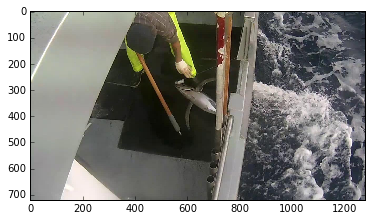

In [1124]:
im = X_sample[0,:,:,:]
imshow(im)

# Extract 320x320 Sliding Window on this sample

In [1125]:
window_height = 320
window_width = 320
window_slide = 5
window_horizontal_idx = 0
window_vertical_idx = 0
window_array = []
horizontal_num_windows = 0
vertical_num_windows = 0

#slide horizontal then vertical
while (window_vertical_idx+window_height) <= X_sample.shape[1]:
    
    
    while (window_horizontal_idx+window_width) <= X_sample.shape[2]:
        X_temp = X_sample[0,window_vertical_idx:window_vertical_idx+window_height,
                         window_horizontal_idx:window_horizontal_idx+window_width,:]
        window_array.append(X_temp)
        window_horizontal_idx += window_slide
        horizontal_num_windows += 1
    window_horizontal_idx = 0
    horizontal_num_windows = 0
    window_vertical_idx += window_slide
    vertical_num_windows += 1
    

In [1030]:
193*81

15633

In [922]:
965*405

390825

In [923]:
len(window_array)

15633

# Reduce window array elements from 320x320 to 32x32

In [1126]:
import time
#12.759
start = time.time()
window_array_reduced = []
for sample in xrange(len(window_array)):
    temp_shrink = np.zeros([32,32,3])
    
    for channel in xrange(3):
        temp_shrink[:,:,channel] = shrink(window_array[sample][:,:,channel], 32, 32)
        
    window_array_reduced.append(temp_shrink)

reduced_array = np.asarray(window_array_reduced)/(100*255)

print('time elapsed: ' + str(time.time() - start))

time elapsed: 11.1940000057


In [964]:
check = reduced_array*255

In [965]:
check = check.astype(int)

In [966]:
check.shape

(15633L, 32L, 32L, 3L)

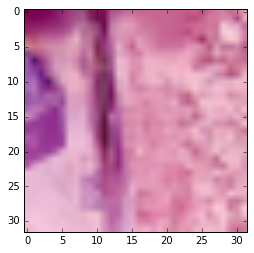

In [1072]:
imshow(check[100,:,:,:])

In [1127]:
X_cnn = np.zeros([reduced_array.shape[0], reduced_array.shape[3], reduced_array.shape[1], reduced_array.shape[2]])
for samples in xrange(reduced_array.shape[0]):
    for channels in xrange(X_train1.shape[3]):
        X_cnn[samples,channels,:,:] = reduced_array[samples,:,:,channels]

In [1050]:
from keras.preprocessing.image import ImageDataGenerator

In [1051]:
# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    zoom_range=[1-0.3, 1+0.3]) # Float or [lower, upper]. Range for random zoom. If a float,  [lower, upper] = [1-zoom_range, 1+zoom_range]
    
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_cnn)

In [1074]:
X_cnn.shape

(15633L, 3L, 32L, 32L)

In [1128]:
reduced_predictions = CNN_model.predict(X_cnn)

In [1132]:
good_predictions = numpy.where(reduced_predictions[:,0] >= 0.998)

In [1133]:
good_predictions[0]

array([2744, 3908], dtype=int64)

# Apparent challenges: sea (dark, deep blue) and other dark regions, like floors, fish too big

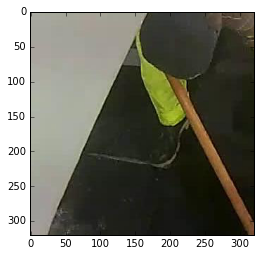

In [1135]:
imshow(window_array[good_predictions[0][0]][:,:,:])

In [1040]:
window_array[good_predictions[0][0]][100:150,100:150,2]

array([[100, 102, 105, ..., 117, 107,  91],
       [101, 101, 102, ..., 121, 119, 103],
       [100, 101, 102, ..., 101,  96,  92],
       ..., 
       [ 96,  95,  95, ...,  69,  69,  69],
       [ 96,  95,  95, ...,  69,  69,  69],
       [ 94,  96,  96, ...,  68,  68,  68]], dtype=uint8)

# Shape of probabilities in 2d space

### Need to reshape window_array

In [927]:
#193 x81

In [928]:
reduced_predictions.shape

(15633L, 4L)

In [1057]:
predictions_2d = np.reshape(reduced_predictions[:,0],[81,193])

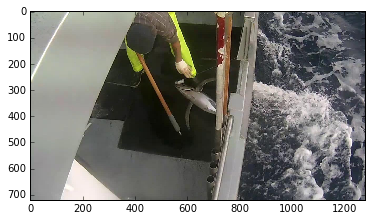

In [1144]:
imshow(im)

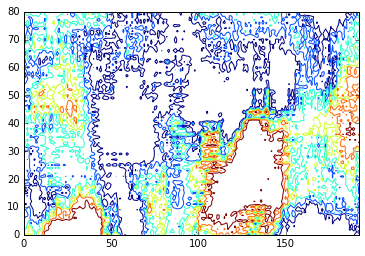

In [1059]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(193)
y = np.linspace(80, 0, 81)
X,Y = meshgrid(x, y)
Z = predictions_2d

fig = figure()

#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X, Y, Z, cmap= cmap)

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.contour(X, Y, Z)

# model 2

In [1060]:
CNN_model2 = load_model('F:/Kaggle/The Nature Conservancy/cnn_models/cnn_cifar100_with_fish_table_outdoor_people_2.h5')

In [1136]:
reduced_predictions = CNN_model2.predict(X_cnn)

In [1141]:
good_predictions = numpy.where(reduced_predictions[:,0] >= 0.998)
good_predictions[0]

array([13533, 14306], dtype=int64)

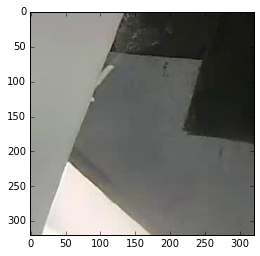

In [1143]:
imshow(window_array[good_predictions[0][0]][:,:,:])